# 读取提取模板所保存的光谱数据

In [2]:
import pandas as pd 
import numpy as np
df = pd.read_csv(rf'H:\大烟叶数据\Spectrum_analyse\大烟叶原始反射光谱数据_split.csv' , index_col = 0)

In [3]:

df_xinhui = df[df.index.str.contains('H')]

labels = df.index.values

spectrum = df.values
wave = [float(i) for i in df.columns.values]

### 绘图查看数据情况

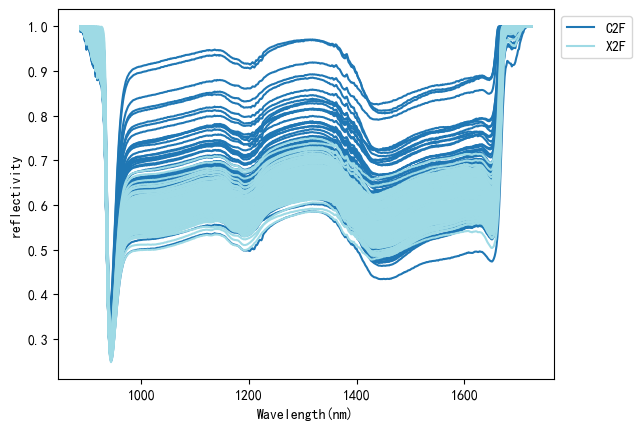

In [4]:
import importlib
import SpectrumAnalyse  # 导入模块

# 导入需要的函数
from SpectrumAnalyse import plot_duplicate_data, split_data
import matplotlib.pyplot as plt

category,  split_datas = split_data(labels , spectrum)
plot_duplicate_data(category,  split_datas , wave , type='all') 


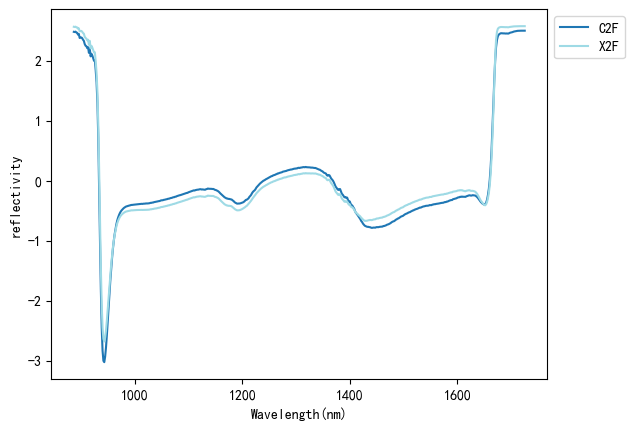

In [10]:
plot_duplicate_data(category,  split_datas , wave , type='mean') 

In [5]:
def snv(ori_specs):
    """标准正态化
    对多个光谱数据进行标准正态化校正，理想光谱采用的是平均光谱
    @param ori_specs: Numpy数组,原始光谱,形状为[n, spec]
    @return: 标准正态变化后的光谱
    """
    # Define v0.1.1-a new array and populate it with the corrected data
    snv_specs = np.zeros_like(ori_specs)
    for i in range(ori_specs.shape[0]):
        # Apply correction
        snv_specs[i, :] = (ori_specs[i, :] - np.mean(ori_specs[i, :])) / np.std(ori_specs[i, :])
    return snv_specs

reflectance_snv = snv(spectrum)

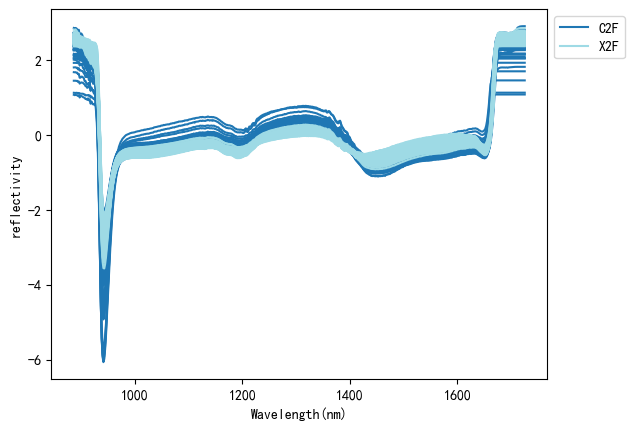

In [11]:
category,  split_datas = split_data(labels , reflectance_snv)
plot_duplicate_data(category,  split_datas , wave , type='all') 



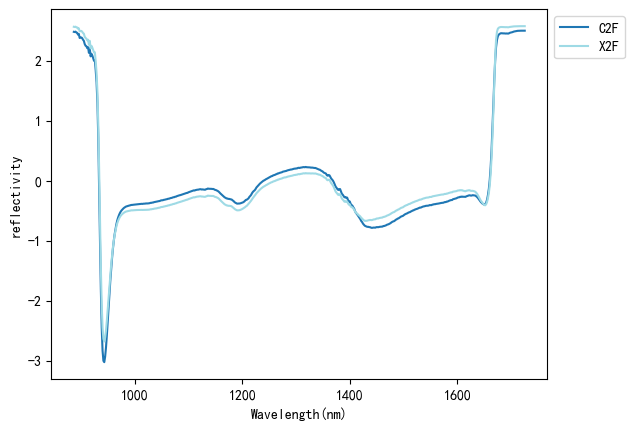

In [12]:
plot_duplicate_data(category,  split_datas , wave , type='mean') 


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# 假设 X 是特征数据，y 是标签数据
X = reflectance_snv  # 使用标准化后的光谱数据
y = labels  # 使用标签

# 定义模型
model = SVC()

# 定义参数网格
param_grid = {
    'C': [0.001, 0.01,0.05, 0.1],  # 惩罚参数
    'kernel': ['linear', 'rbf', 'poly'],  # 核函数类型
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # 核函数的gamma值
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# 进行网格搜索
grid_search.fit(X, y)

# 打印最优参数和最优得分
print(f"最优参数: {grid_search.best_params_}")
print(f"最优得分: {grid_search.best_score_}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
最优参数: {'C': 0.001, 'gamma': 1, 'kernel': 'poly'}
最优得分: 0.916728778467909


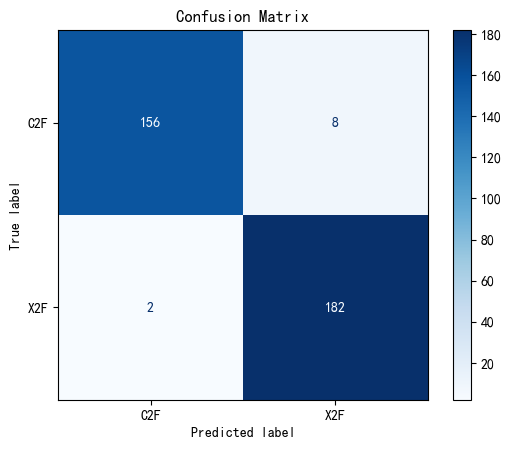

五折交叉验证的平均准确率: 0.97


In [8]:
import importlib
importlib.reload(SpectrumAnalyse)

from SpectrumAnalyse import k_fold_cross_validation
from sklearn.svm import SVC
from sklearn.model_selection import KFold
model = SVC(C=0.001, kernel='poly', gamma=1)
k_fold_cross_validation(snv(spectrum), np.array(labels), model, n_splits=5)

留一交叉验证的平均准确率: 0.99


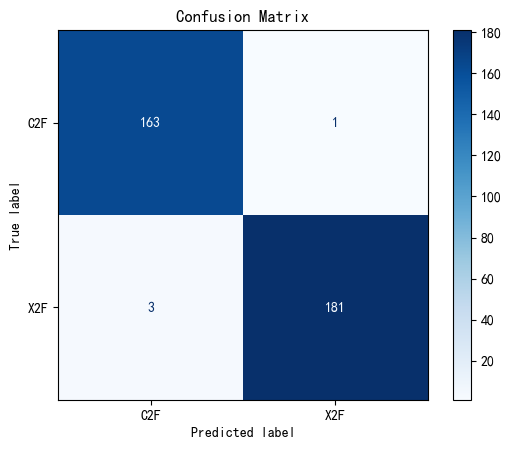

np.float64(0.9885057471264368)

In [9]:
from SpectrumAnalyse import leave_one_out_cross_validation

leave_one_out_cross_validation(snv(spectrum), np.array(labels), model)
